In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_explode = df.explode('job_skills')
skills_counts = df_explode.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_counts.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by="skill_count")

df_skills_count

,job_title_short,job_skills,skill_count
1157,Machine Learning Engineer,asp.net core,1
2187,Software Engineer,rubyon rails,1
1983,Senior Data Scientist,symfony,1
1289,Machine Learning Engineer,powerbi,1
776,Data Engineer,linode,1
...,...,...,...
1101,Data Scientist,sql,78982
625,Data Analyst,sql,92428
830,Data Engineer,python,108022
865,Data Engineer,sql,113130


In [19]:
job_titles = ['Software Engineer', 'Data Engineer', 'Data Analyst']

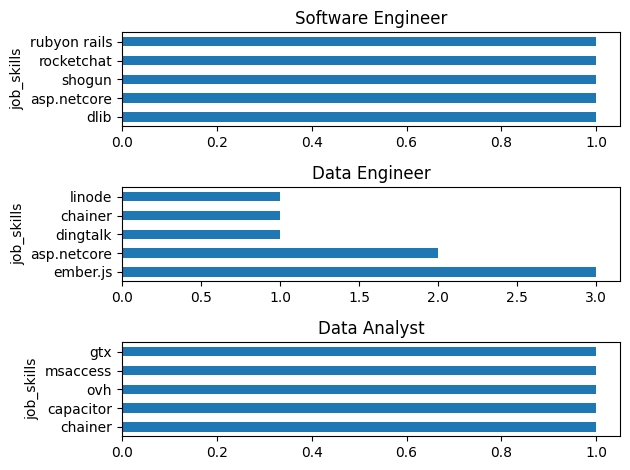

In [28]:
fig, ax = plt.subplots(3,1)

for i, title in enumerate(job_titles):
     df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5)
     df_plot.plot(kind = 'barh', x ='job_skills', y = "skill_count", ax = ax[i], title= title)
     ax[i].invert_yaxis()
     ax[i].legend().set_visible(False)

fig.tight_layout()

